In [82]:
import cv2
import os, sys
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.9 


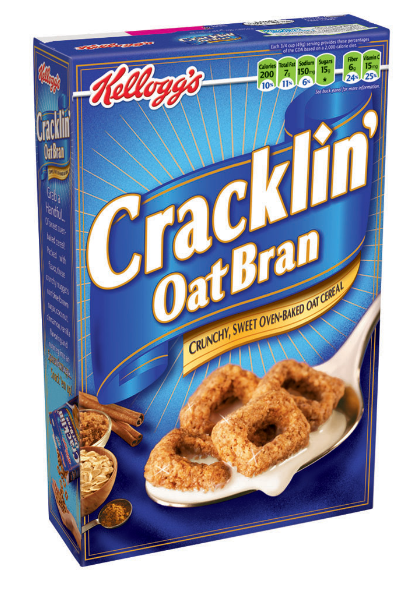

In [83]:
# Load the image
# Plot original image (with shadow)
img = cv2.imread('../img/img_104_kelloggcracklinoatbran.jpg')
gray = cv2.imread('../img/img_104_kelloggcracklinoatbran.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.axis('off');
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

[]

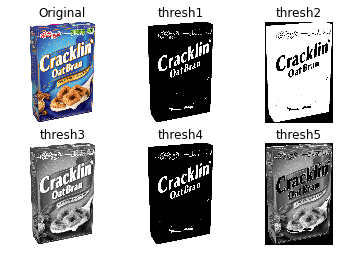

In [84]:
# Threshold
ret,thresh1 = cv2.threshold(gray,240,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,240,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,240,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,240,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,240,255,cv2.THRESH_TOZERO_INV)
original = 'cv2.cvtColor(img, cv2.COLOR_BGR2RGB)'
thresh = [original,'thresh1','thresh2','thresh3','thresh4','thresh5']
 
for i in range(6):
    plt.subplot(2,3,i + 1),plt.imshow(eval(thresh[i]), 'gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')
    else:
        plt.title(thresh[i])
 
plt.plot()

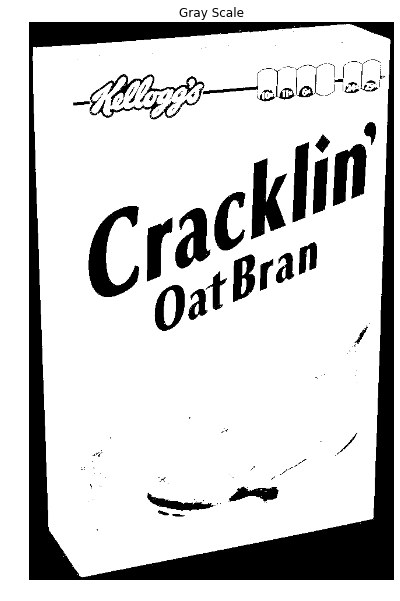

In [85]:
# THRESH_BINARY_INV on grayscale gives the best result
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Gray Scale')
plt.imshow(eval(thresh[2]), 'gray')

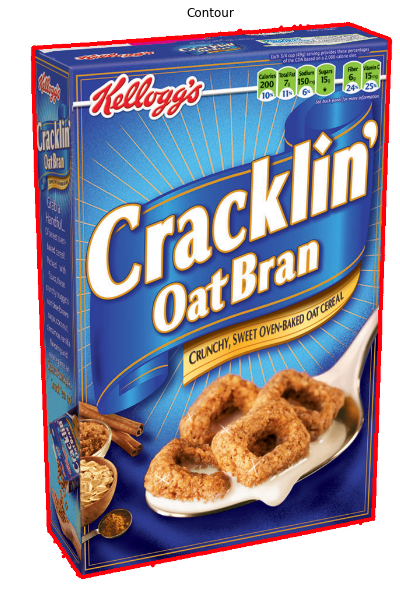

In [86]:
# Find and draw the contour
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1,(10,0,255),5)

plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Contour')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [87]:
# Convert jpg to png
print img.shape

img_jpg = Image.open('../img/img_104_kelloggcracklinoatbran.jpg')
img_png = img_jpg.convert("RGBA")
img_png.save('../code/img_104_kelloggcracklinoatbran.png', "PNG")

alpha_img = cv2.imread('../code/img_104_kelloggcracklinoatbran.png',cv2.IMREAD_UNCHANGED)

print alpha_img.shape

(960, 626, 3)
(960, 626, 4)


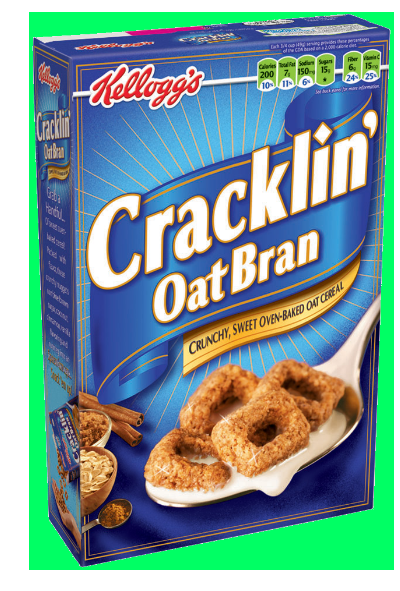

In [89]:
# Check whether pointPolygonTest work normally
for y in range(alpha_img.shape[1]):
    for x in range(alpha_img.shape[0]):
        if cv2.pointPolygonTest(contours[14], tuple([y, x]), False) == -1.0:
            alpha_img[x, y] = [100, 255, 0, 255]
            
            
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(cv2.cvtColor(alpha_img, cv2.COLOR_BGR2RGB));

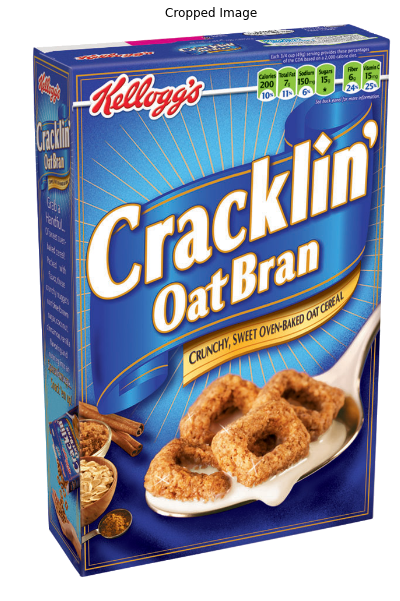

In [90]:
# Convert alpha values outside contour to be transparent (shadow removed)
for y in range(alpha_img.shape[1]):
    for x in range(alpha_img.shape[0]):
        if cv2.pointPolygonTest(contours[14], tuple([y, x]), False) == -1.0:
            alpha_img[x, y] = [255, 255, 255, 0]
            
            
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Cropped Image')
plt.imshow(cv2.cvtColor(alpha_img, cv2.COLOR_BGR2RGB));

In [91]:
# Save the cropped file
cv2.imwrite("../img/kelvin_cropped/img_104_kelloggcracklinoatbran_cropped.png", alpha_img)

# Remove the png file
import os, sys
os.remove("../code/img_104_kelloggcracklinoatbran.png")